In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR,SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,r2_score

In [6]:
df=pd.read_csv('/content/mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [7]:
print(df.shape)
print(df.columns)
print(df.describe())
print(df.info())

(2000, 26)
Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')
        Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data 

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [9]:
df.duplicated().sum()

np.int64(1024)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

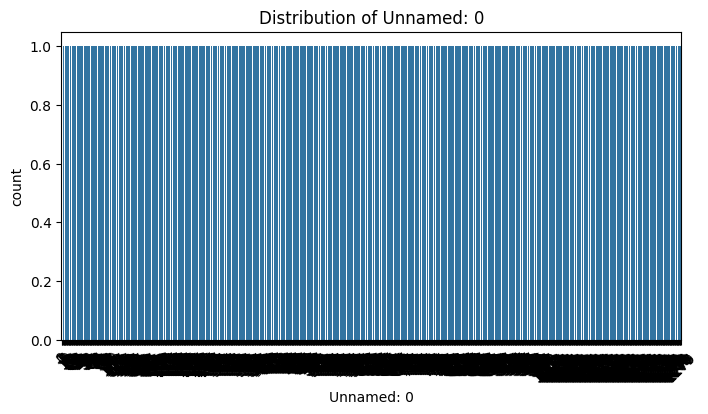

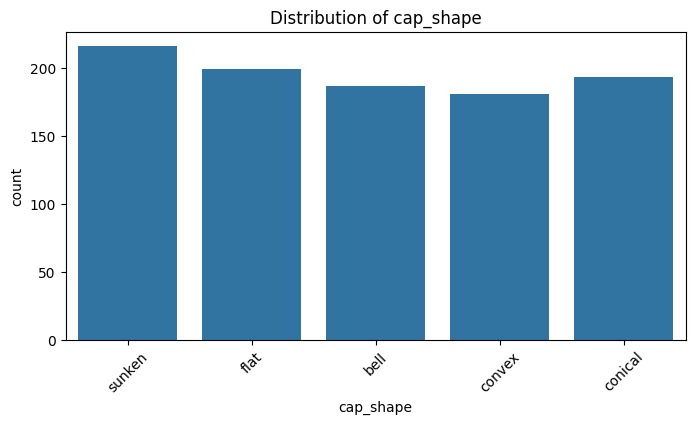

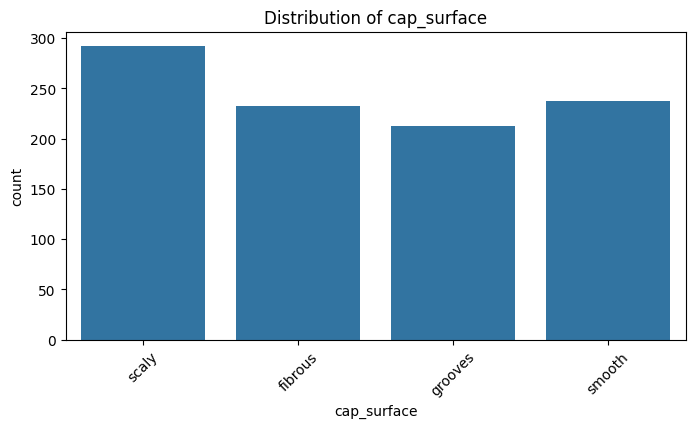

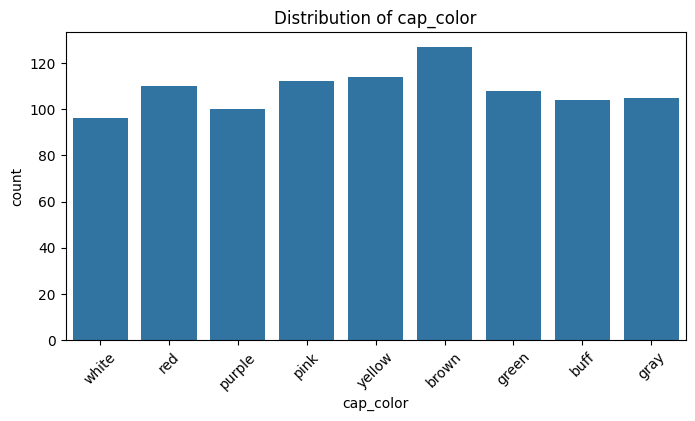

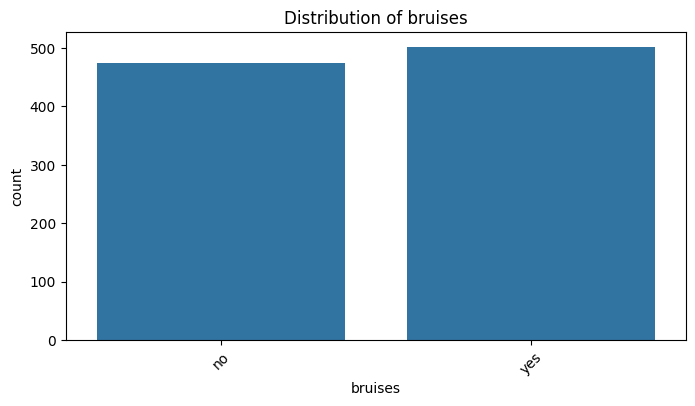

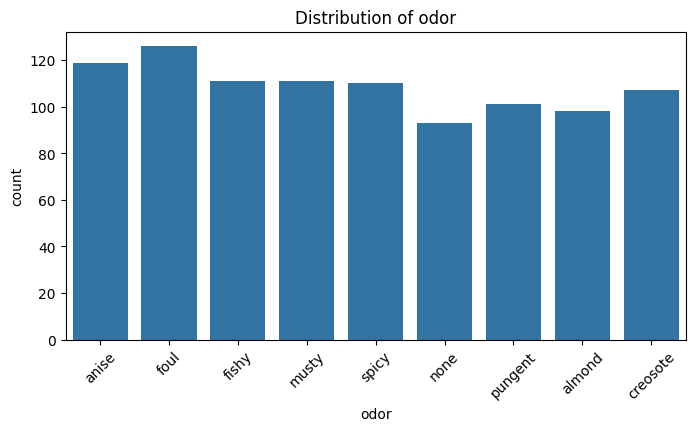

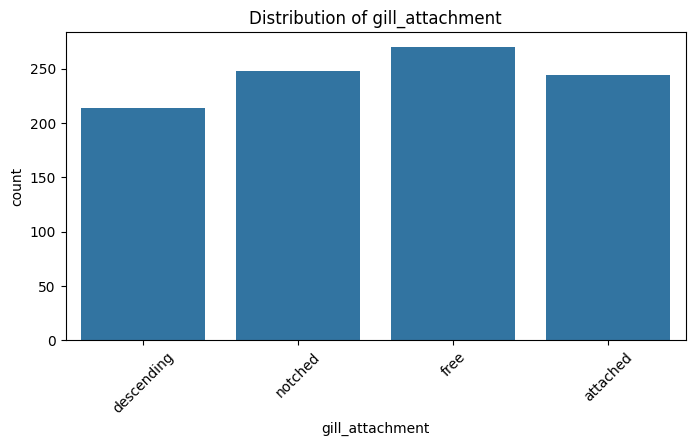

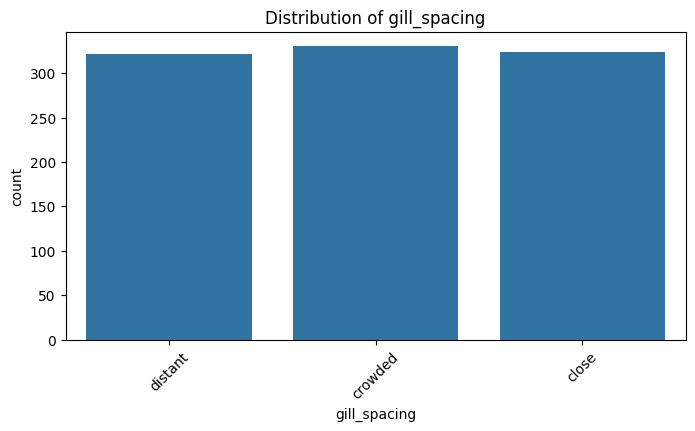

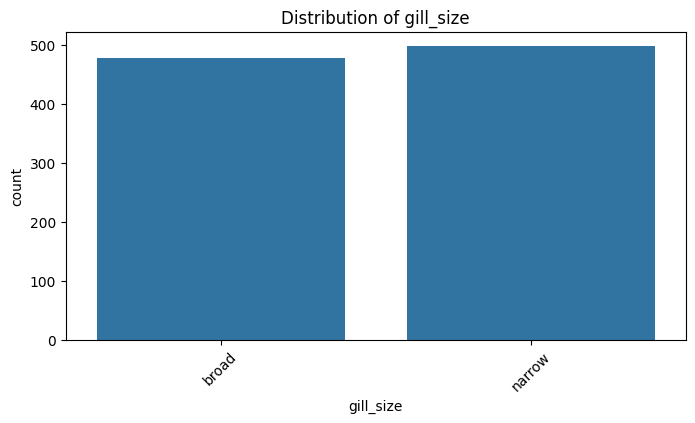

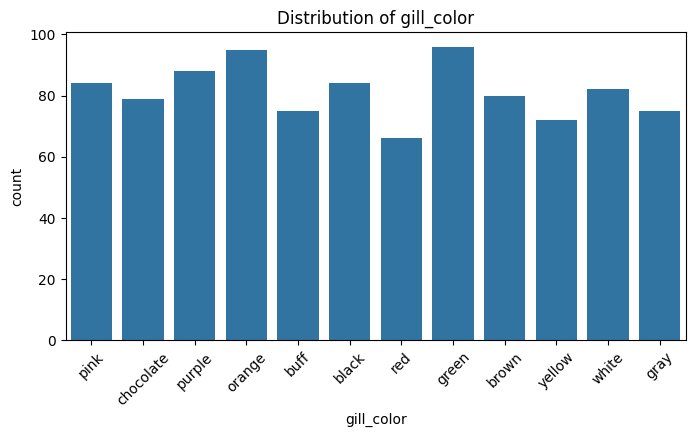

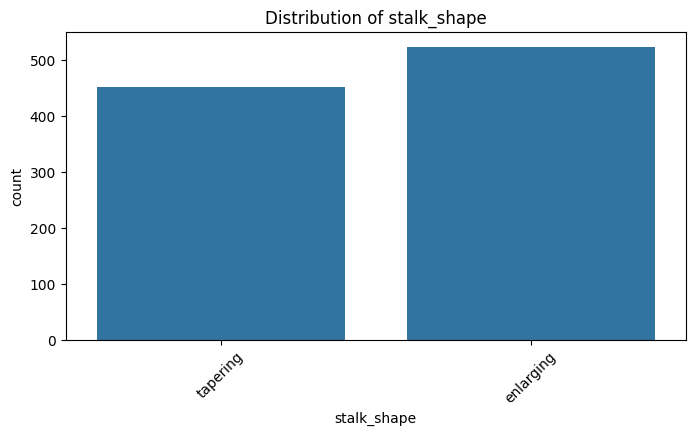

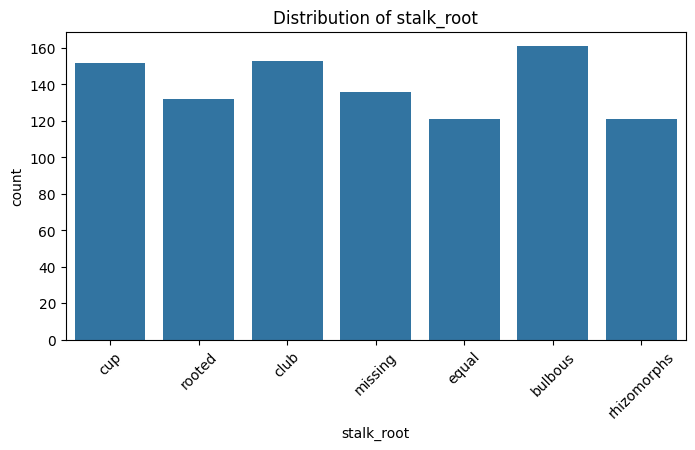

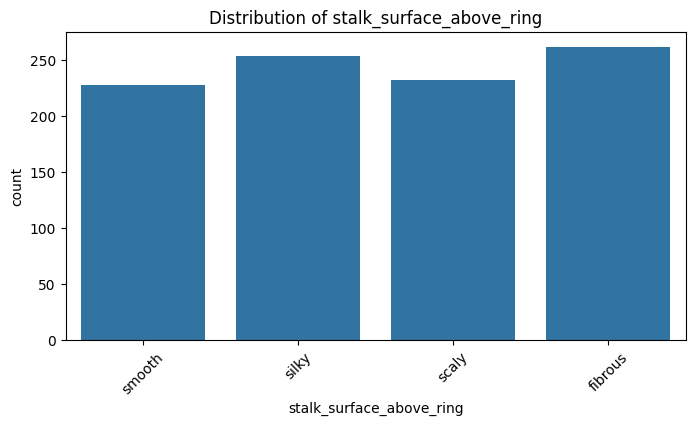

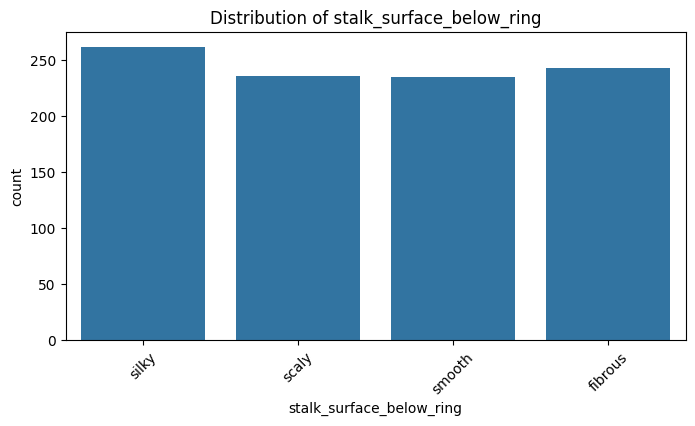

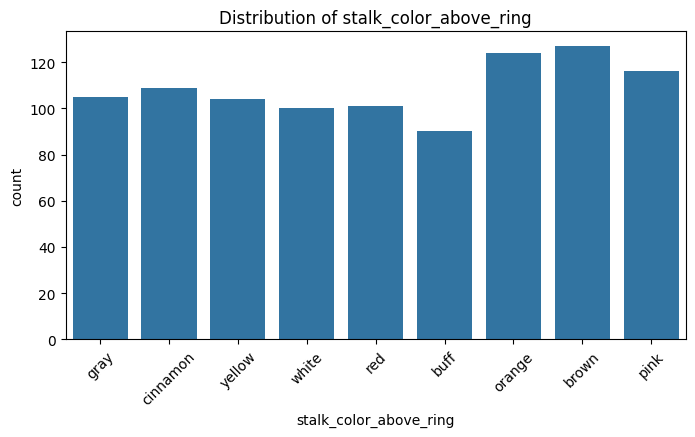

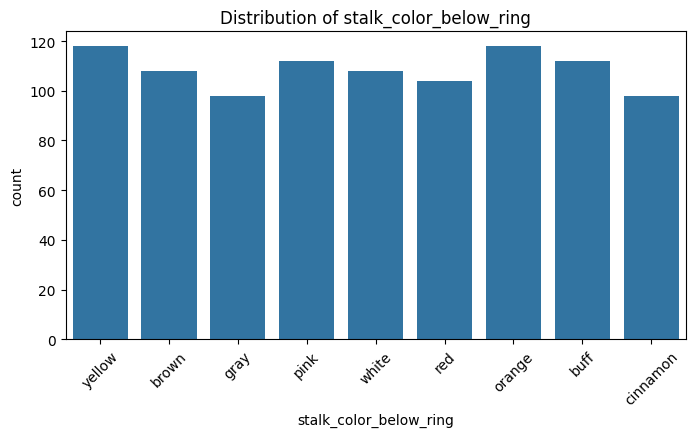

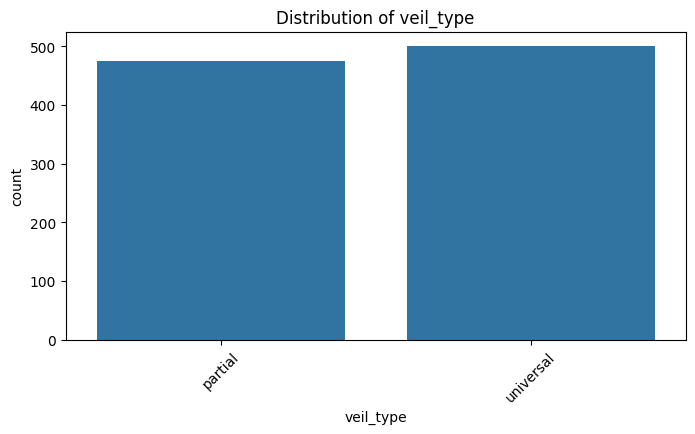

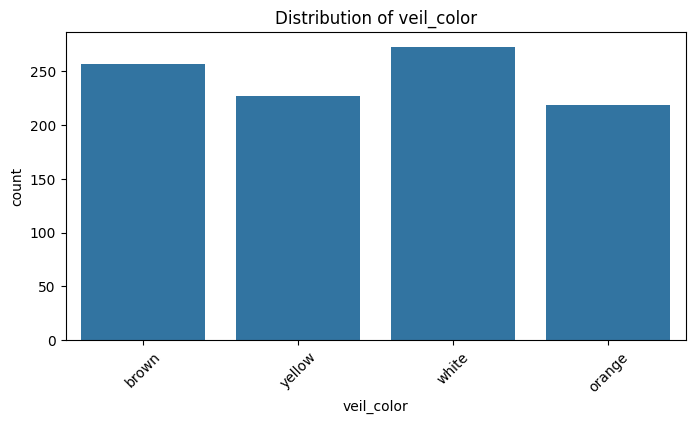

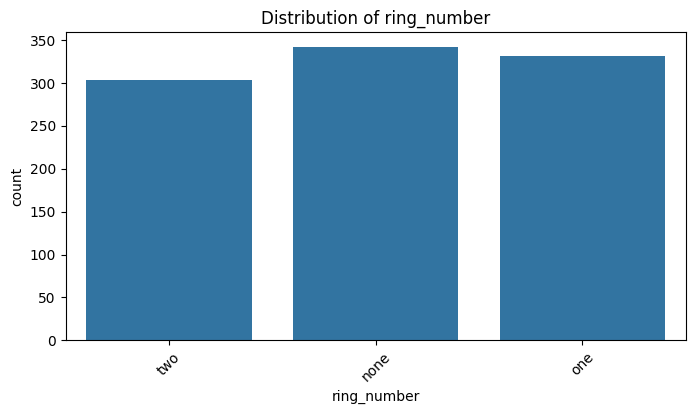

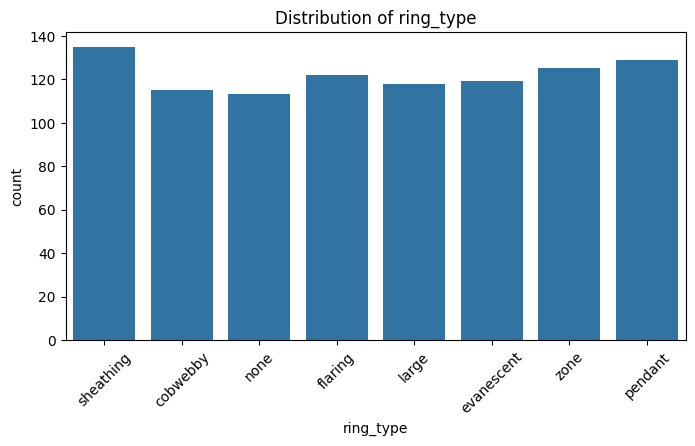

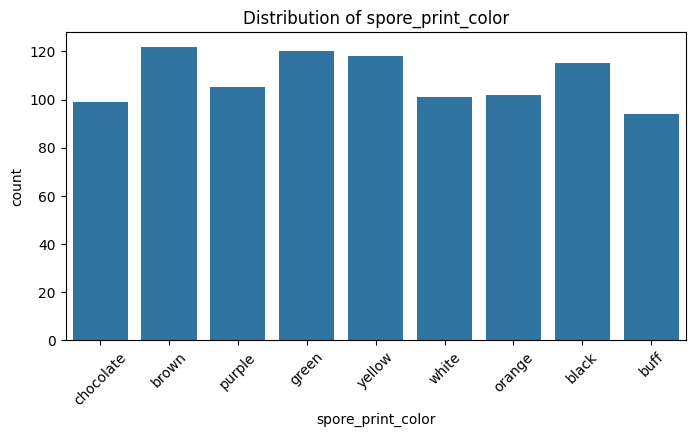

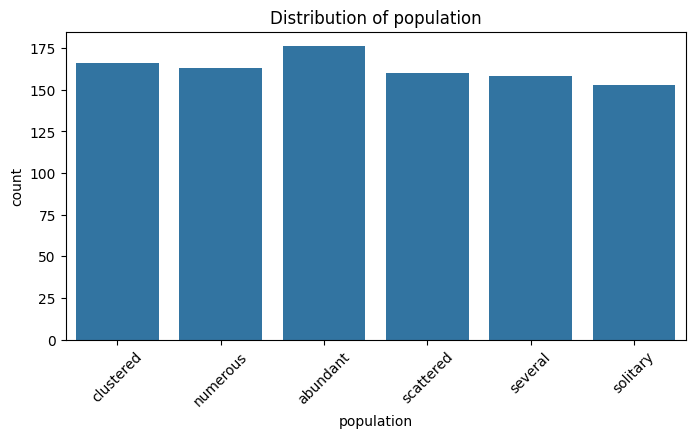

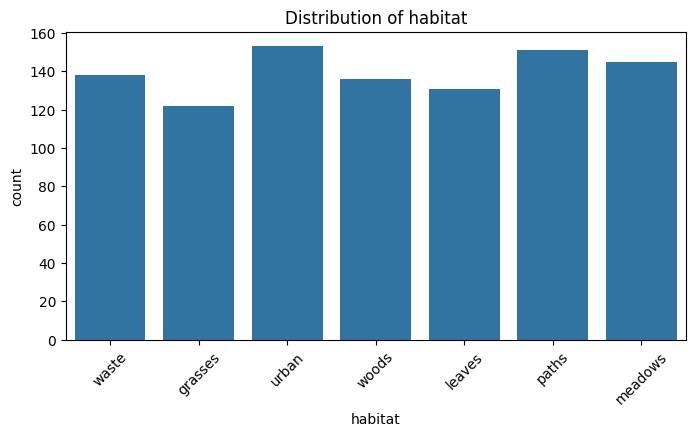

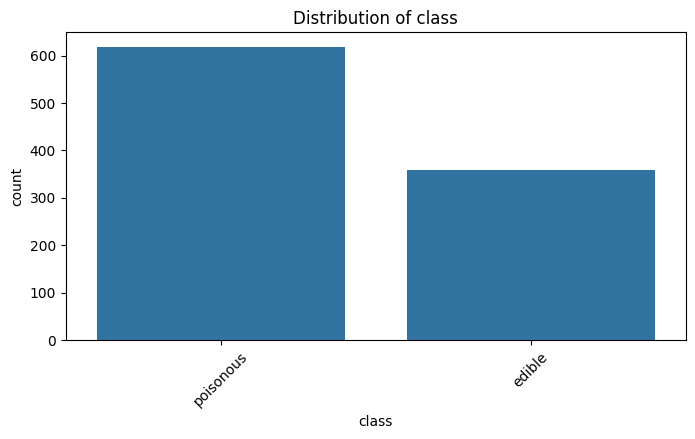

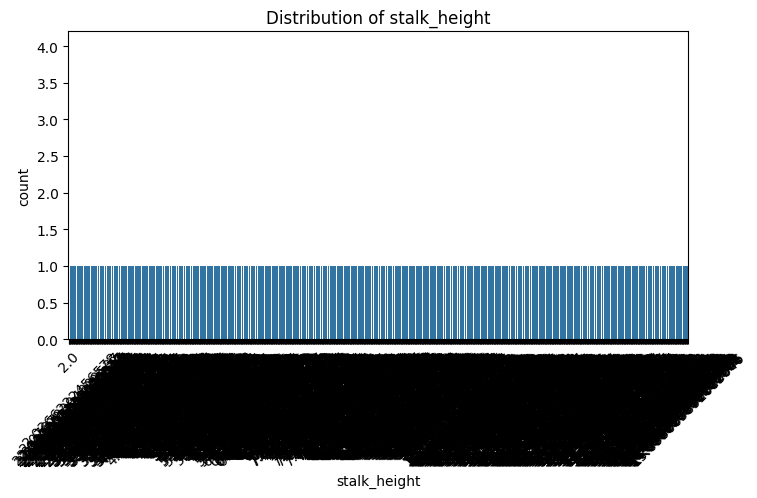

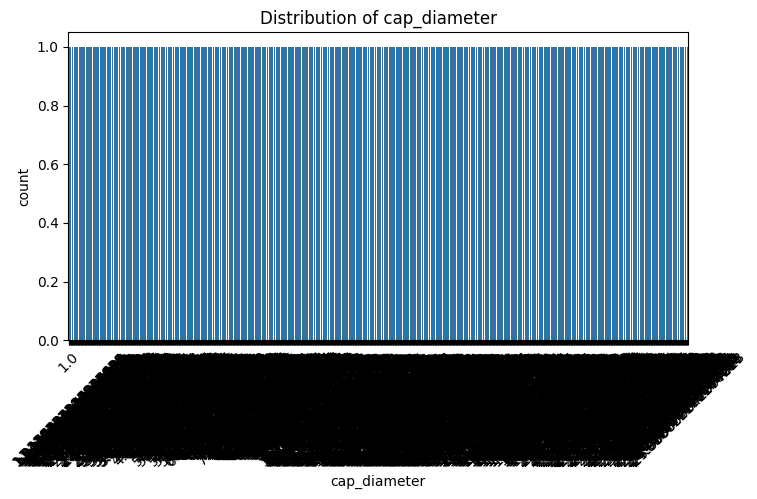

In [12]:
for column in df.columns:
  plt.figure(figsize=(8,4))
  sns.countplot(x=column,data=df)
  plt.title(f'Distribution of {column}')
  plt.xticks(rotation=45)
  plt.show()



df_encoded=df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(),annot=False,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
##3 Features and Target
features = df.drop('class', axis=1)
target = df['class']

In [15]:
X_encoded=pd.get_dummies(features)
label_encoder= LabelEncoder()
y_encoded=label_encoder.fit_transform(target)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X_encoded,y_encoded,test_size=0.2,random_state=42)

In [17]:
pca=PCA(n_components=2)
x_reduced=pca.fit_transform(X_encoded)

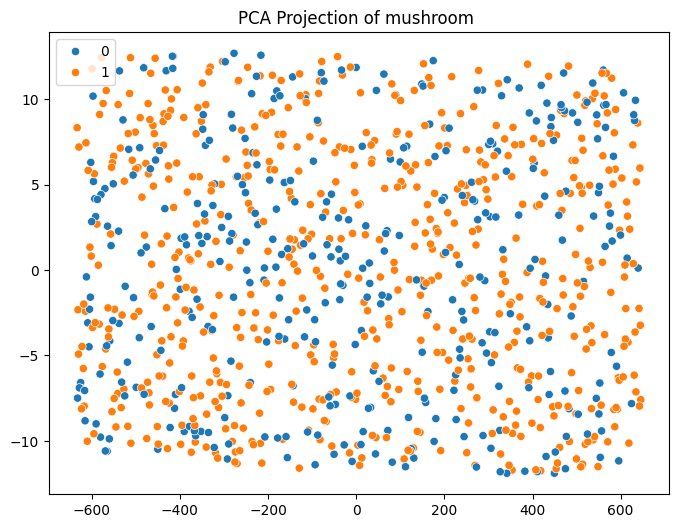

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_reduced[:,0] ,y=x_reduced[:,1],hue=y_encoded)
plt.title('PCA Projection of mushroom ')
plt.show()

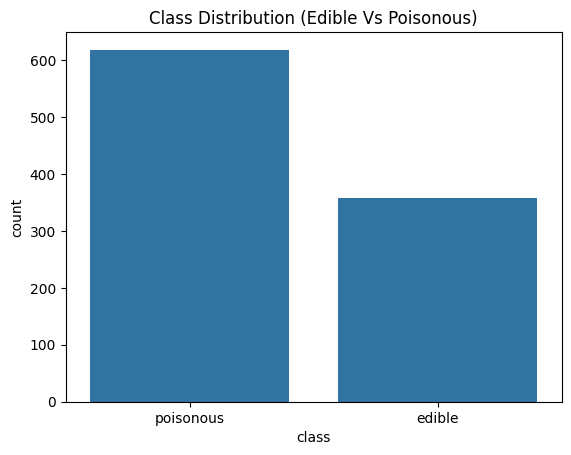

In [19]:
## visualize the class Distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution (Edible Vs Poisonous)')
plt.show()

In [20]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [21]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15 57]
 [27 97]]
              precision    recall  f1-score   support

           0       0.36      0.21      0.26        72
           1       0.63      0.78      0.70       124

    accuracy                           0.57       196
   macro avg       0.49      0.50      0.48       196
weighted avg       0.53      0.57      0.54       196



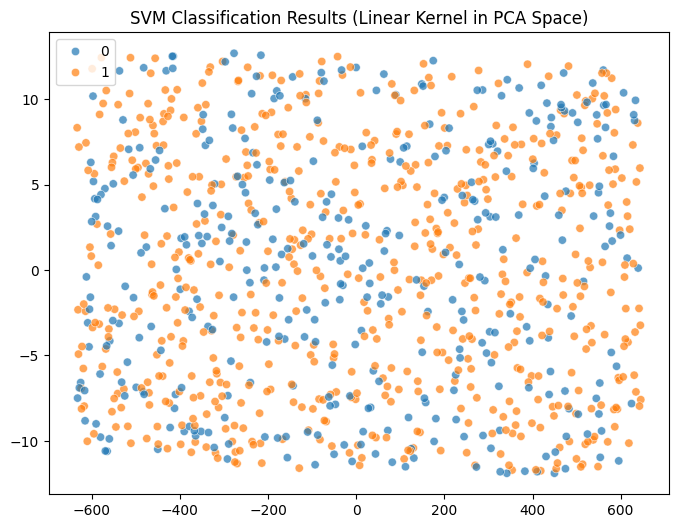

In [22]:
svm_pca = SVC(kernel='linear')
svm_pca.fit(x_reduced, y_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=y_encoded, alpha=0.7)
plt.title("SVM Classification Results (Linear Kernel in PCA Space)")
plt.show()


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear','rbf','poly'],
    'gamma' : ['scale', ' auto']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)
grid.fit(x_train, y_train)

print('Best Parameters:',grid.best_params_)
print('Best Score', grid.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.590 total time=  12.2s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.545 total time=  13.9s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.609 total time=  10.3s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.596 total time=   8.2s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.622 total time=  12.2s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.635 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.635 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.635 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.635 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.628 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly;

In [ ]:
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(f"kernel: {kernel}")
    print(classification_report(y_test, preds))

Discuss practical implications of SVM in real-world classification task

SVMs are effective for:

High-Dimensional Data: Works well in text classification or bioinformatics with many features.

Non-Linear Decision Boundaries: Uses kernels to separate complex patterns (e.g., in medical diagnosis).

Robustness to Overfitting: Performs well in small datasets with clear margins. Applications: Image recognition, fraud detection, and bioinformatics.